# Game of Life

In [1]:
# Team Members:            Jenni, Ashton, and Isaac
# Last Modification Date:  09/07/2023
# Program Name:            Game of Life
# Program Description:     This program simulates the John Conway's Game of Life
# Notes:                   Do not use this code for the submission. It emplements the Game of Life with an "infinite" border, 
#                          not with the "cheating" board discussed in class. 

## Function

### Rules:

1) *Each cell with one or no neighbors dies, as if by solitude.*
2) *Each cell with four or more neighbors dies, as if by overpopulation.*
3) *Each cell with three neighbors becomes populated.*
4) *Each cell with two or three neighbors survives.*


In [2]:
using PlotlyJS

WebIO._IJuliaInit()

In [41]:
function DeadOrAlive(Board, n)
    rowArray = [ 0,  -1, -1, -1, 0, 1, 1,  1];
    colArray = [-1, -1,  0,  1, 1, 1, 0, -1];
    CountBoard = zeros(n, n);

    for i in 1:n
        for j in 1:n
            # Check each neighbor. Each cell has a total of 8 neighbors. 
            # I would keep a neighbors alives count.
            neighborCount = 0;

            for k in 1:8
                row = i + rowArray[k];
                col = j + colArray[k];

                #Check for out of bounds
                if (row == 0)
                    row = n;
                elseif (row == (n + 1))
                    row = 1;
                end

                if (col == 0)
                    col = n;
                elseif (col == (n + 1))
                    col = 1;
                end

                if (Board[row, col] == 1)
                    neighborCount += 1;
                end
            end

            CountBoard[i, j] = neighborCount;
        end
    end
    
    for i in 1:n
        for j in 1:n  
            # Rule 1: Each cell with one or no neighbors dies, as if by solitude.
            if (CountBoard[i, j] < 2)
                Board[i, j] = 0;

            # Rule 2: Each cell with four or more neighbors dies, as if by overpopulation.
            elseif (CountBoard[i, j] > 3)
                Board[i, j] = 0;

            # Rule 3: Each cell with three neighbors becomes populated.
            elseif (CountBoard[i, j] == 3)
                Board[i, j] = 1;

            # Rule 4: Each cell with two or three neighbors survives.
            else
                # Do nothing
            end
        end
    end
end

DeadOrAlive (generic function with 1 method)

## Game

In [44]:
using PlotlyJS

n = 64;
Board = rand((0, 1), (n, n))
CheatingBoard = zeros(Int64, n+4, n+4)

CheatingBoard[3:n+2, 3:n+2] += Board;


display(Board)
display(CheatingBoard)

PlotlyJS.plot(
    PlotlyJS.heatmap(
        y = [0.5, 1.5, 2.5],
        x = [0.5, 1.5, 2.5],
        z = CheatingBoard[end:-1:1, 1:1:end],
        reverscale = true,
        type = "heatmap",
        colorscale = [[0, "rgb(255,255,255)"], [1, "rgb(0,255,0)"]],
        name = "Game Of Life",
    )
)

64×64 Matrix{Int64}:
 0  1  0  1  0  0  1  0  0  1  0  1  1  …  0  0  1  1  0  0  1  0  0  0  1  0
 1  0  1  1  1  1  1  0  0  1  0  1  1     1  0  1  0  1  0  1  1  1  0  0  0
 1  0  1  1  0  0  1  0  1  1  1  0  0     1  1  1  1  0  1  0  0  1  1  0  1
 1  0  1  0  1  0  0  0  1  1  1  0  1     0  0  1  1  1  1  1  1  1  0  0  1
 1  0  1  1  0  0  0  1  0  0  1  0  0     1  0  0  1  1  1  0  1  1  1  0  1
 1  1  1  0  1  0  0  0  1  1  0  0  1  …  1  0  0  0  0  1  1  1  0  1  0  0
 1  1  1  1  1  0  1  0  0  1  1  1  0     1  0  0  0  1  0  1  1  0  0  1  0
 1  1  0  1  0  0  1  1  1  0  0  0  0     0  1  0  0  0  0  0  0  0  0  1  0
 1  1  0  1  1  1  0  0  1  1  0  1  0     1  0  1  0  0  0  0  1  1  1  0  1
 0  0  1  1  0  0  1  1  1  0  1  1  0     0  1  0  1  0  0  1  0  0  0  0  0
 1  1  0  0  0  0  0  1  0  1  1  0  1  …  1  0  1  0  1  1  1  0  0  1  1  1
 1  0  1  1  1  0  1  0  0  0  1  0  0     1  1  0  0  1  0  1  0  1  1  1  1
 1  0  1  1  1  1  0  0  1  0  0  1  1     

68×68 Matrix{Int64}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  1  0  0  1  0  0  1  0     1  1  0  0  1  0  0  0  1  0  0  0
 0  0  1  0  1  1  1  1  1  0  0  1  0     1  0  1  0  1  1  1  0  0  0  0  0
 0  0  1  0  1  1  0  0  1  0  1  1  1     1  1  0  1  0  0  1  1  0  1  0  0
 0  0  1  0  1  0  1  0  0  0  1  1  1  …  1  1  1  1  1  1  1  0  0  1  0  0
 0  0  1  0  1  1  0  0  0  1  0  0  1     0  1  1  1  0  1  1  1  0  1  0  0
 0  0  1  1  1  0  1  0  0  0  1  1  0     0  0  0  1  1  1  0  1  0  0  0  0
 0  0  1  1  1  1  1  0  1  0  0  1  1     0  0  1  0  1  1  0  0  1  0  0  0
 0  0  1  1  0  1  0  0  1  1  1  0  0     0  0  0  0  0  0  0  0  1  0  0  0
 0  0  1  1  0  1  1  1  0  0  1  1  0  …  1  0  0  0  0  1  1  1  0  1  0  0
 0  0  0  0  1  1  0  0  1  1  1  0  1     0  1  0  0  1  0  0  0  0  0  0  0
 0  0  1  1  0  0  0  0  0  1  0  1  1     

data: [
  "heatmap with fields colorscale, name, reverscale, transpose, type, x, y, and z"
]

layout: "layout with fields margin and template"

In [38]:
using Plots

    DeadOrAlive(Board, n)
    PlotlyJS.plot(
        PlotlyJS.heatmap(
            y = [0.5, 1.5, 2.5],
            x = [0.5, 1.5, 2.5],
            z = Board[end:-1:1, 1:1:end],
            reverscale = true,
            type = "heatmap",
            colorscale = [[0, "rgb(255,255,255)"], [1, "rgb(0,255,0)"]],
            name = "Game Of Life",
        )
    )
end

gif(anim, "anim_fps16.gif", fps = 5)

LoadError: UndefVarError: `row` not defined

[ Info: Saved animation to C:\Users\isaac\Desktop\Redactando\MA 2600\anim_fps16.gif


Plots.AnimatedGif("C:\\Users\\isaac\\Desktop\\Redactando\\MA 2600\\anim_fps16.gif")
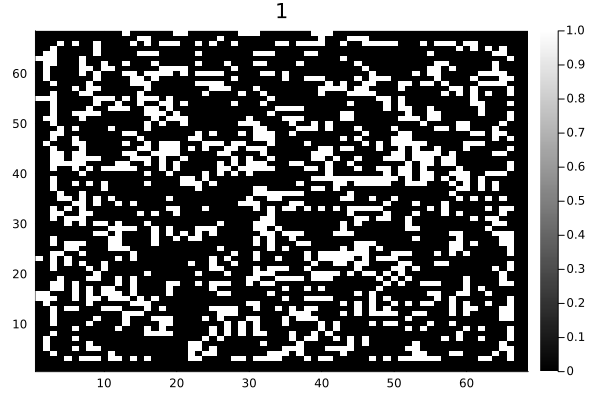

In [45]:
using Plots 
gr()

animation = @animate for i ∈ 1:100
    DeadOrAlive(CheatingBoard, n+2)
    Plots.heatmap(
        CheatingBoard[end:-1:1, 1:1:end],
        c = cgrad([:black, :white]),
        title = i
    )
end

gif(animation, "anim_fps16.gif", fps = 2)

[ Info: Saved animation to C:\Users\isaac\Desktop\Redactando\MA 2600\tutorial_anim_fps30.gif


Plots.AnimatedGif("C:\\Users\\isaac\\Desktop\\Redactando\\MA 2600\\tutorial_anim_fps30.gif")
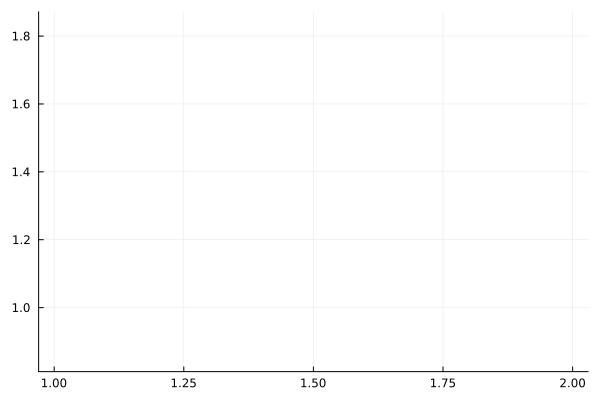

In [6]:
using Plots
 
x = collect(1:0.1:30)
y = sin.(x)
df = 2
 
anim = @animate for i = 1:df:length(x)
    Plots.plot(x[1:i], y[1:i], legend=false)
end
 
gif(anim, "tutorial_anim_fps30.gif", fps = 30)

5×5 Matrix{Int64}:
 0  0  0  0  0
 0  0  1  0  0
 0  0  0  1  0
 0  1  1  1  0
 0  0  0  0  0

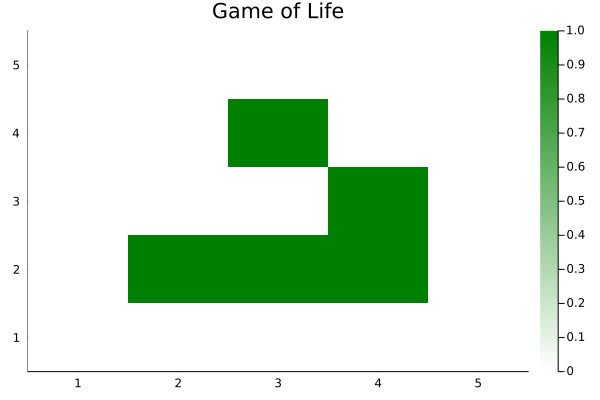

In [50]:
test = [0 0 0 0 0 ; 0 0 1 0 0 ; 0 0 0 1 0 ; 0 1 1 1 0 ; 0 0 0 0 0];
display(test)
Plots.heatmap(
    test[end:-1:1, 1:1:end],
    c = cgrad([:white, :green]),
    title = "Game of Life"
)

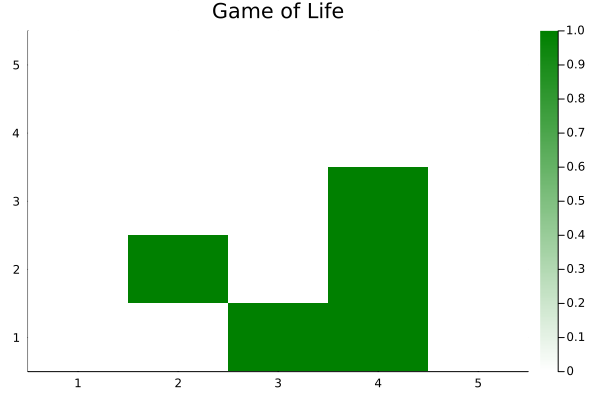

In [53]:
DeadOrAlive(test, 5)
Plots.heatmap(
    test[end:-1:1, 1:1:end],
    c = cgrad([:white, :green]),
    title = "Game of Life"
)